In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
sns.set(font_scale=1.1)

# Ensure folders exist
os.makedirs("reports/figures", exist_ok=True)

DATA_PATH = "C:\\Users\\lenovo\\kidney-mlops-project\\data\\raw\\kidney_dataset.csv"
TARGET_COL = "CKD_Status"


In [18]:
df = pd.read_csv(DATA_PATH)
df.head()


,Creatinine,BUN,GFR,Urine_Output,Diabetes,Hypertension,Age,Protein_in_Urine,Water_Intake,Medication,CKD_Status
0,0.788803,8.386869,102.161787,1632.649387,0,0,27.682074,106.700203,1.570370,NaN,0
1,3.413970,53.688796,50.071257,935.540516,1,0,33.122208,410.008362,3.425287,ACE Inhibitor,1
2,0.647645,7.466540,89.451831,1774.553846,1,1,55.832284,123.336925,1.123301,Diuretic,0
3,0.795508,12.516821,99.872180,2360.602980,0,0,32.391900,116.098870,3.086846,ACE Inhibitor,0
4,0.869010,19.855960,86.110182,1987.750901,0,1,66.689515,55.668760,2.174980,ARB,0


In [19]:
print("Shape:", df.shape)
print("\nData types:")
print(df.dtypes)

print("\nSummary statistics (numeric):")
display(df.describe().T)

print("\nSummary statistics (categorical / object):")
display(df.describe(include="object").T)


Shape: (5000, 11)

Data types:
Creatinine          float64
BUN                 float64
GFR                 float64
Urine_Output        float64
Diabetes              int64
Hypertension          int64
Age                 float64
Protein_in_Urine    float64
Water_Intake        float64
Medication           object
CKD_Status            int64
dtype: object

Summary statistics (numeric):


,count,mean,std,min,25%,50%,75%,max
Creatinine,5000.0,1.994088,2.027013,0.600040,0.801333,1.007629,2.163997,7.996428
BUN,5000.0,30.780063,31.148341,7.007732,11.367599,15.878566,40.636666,119.931652
GFR,5000.0,73.251883,31.972399,5.000000,53.036801,89.555882,93.989273,105.451432
Urine_Output,5000.0,1664.302800,599.384655,400.502554,1105.890821,1814.499690,2146.441778,2499.939696
Diabetes,5000.0,0.294000,0.455637,0.000000,0.000000,0.000000,1.000000,1.000000
Hypertension,5000.0,0.378200,0.484986,0.000000,0.000000,0.000000,1.000000,1.000000
Age,5000.0,50.048733,14.492020,18.000000,40.190016,49.942824,59.761132,90.000000
Protein_in_Urine,5000.0,537.053851,817.510451,50.010471,83.692533,119.492591,588.428649,2997.724192
Water_Intake,5000.0,2.504335,0.868925,1.000810,1.744138,2.511710,3.268812,3.998043
CKD_Status,5000.0,0.263000,0.440306,0.000000,0.000000,0.000000,1.000000,1.000000



Summary statistics (categorical / object):


,count,unique,top,freq
Medication,2013,3,ACE Inhibitor,1013


In [20]:
missing_counts = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing_counts / len(df)) * 100

missing_df = pd.DataFrame({
    "missing_count": missing_counts,
    "missing_pct": missing_pct.round(2)
})
missing_df[missing_df["missing_count"] > 0]


,missing_count,missing_pct
Medication,2987,59.74


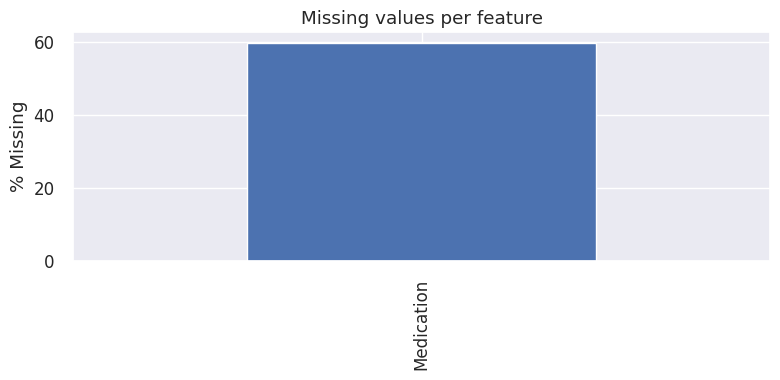

In [21]:
plt.figure(figsize=(8, 4))
missing_df[missing_df["missing_count"] > 0]["missing_pct"].plot(kind="bar")
plt.ylabel("% Missing")
plt.title("Missing values per feature")
plt.tight_layout()
plt.savefig("reports/figures/missing_values.png")
plt.show()


In [22]:
df[TARGET_COL].value_counts(normalize=False)


CKD_Status
0    3685
1    1315
Name: count, dtype: int64

In [23]:
num_cols = [
    "Creatinine", "BUN", "GFR", "Urine_Output",
    "Age", "Protein_in_Urine", "Water_Intake"
]

cat_cols = [
    "Diabetes", "Hypertension", "Medication"
]

num_cols = [c for c in num_cols if c in df.columns]
cat_cols = [c for c in cat_cols if c in df.columns]

num_cols, cat_cols


(['Creatinine',
  'BUN',
  'GFR',
  'Urine_Output',
  'Age',
  'Protein_in_Urine',
  'Water_Intake'],
 ['Diabetes', 'Hypertension', 'Medication'])

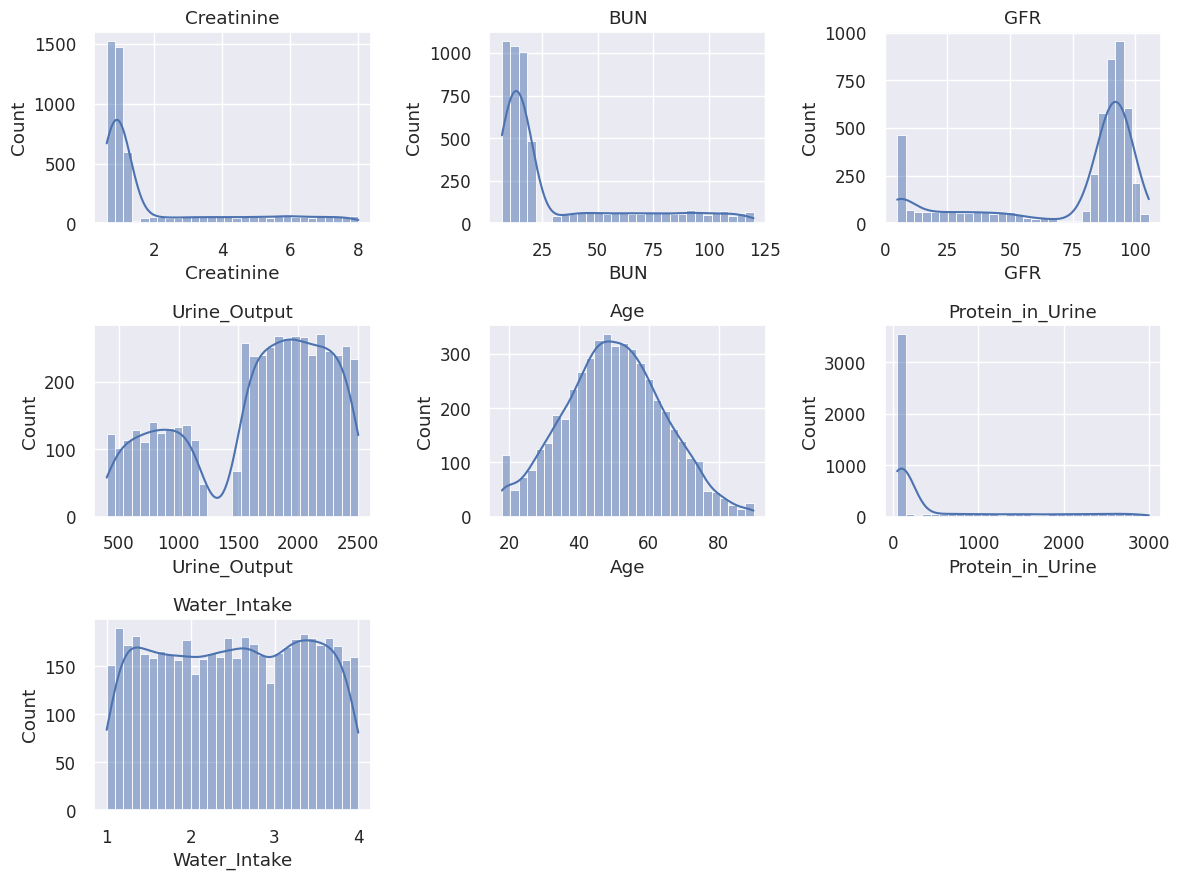

In [24]:
n = len(num_cols)
plt.figure(figsize=(4 * ((n + 2) // 3), 3 * 3))

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.savefig("reports/figures/numeric_histograms.png")
plt.show()


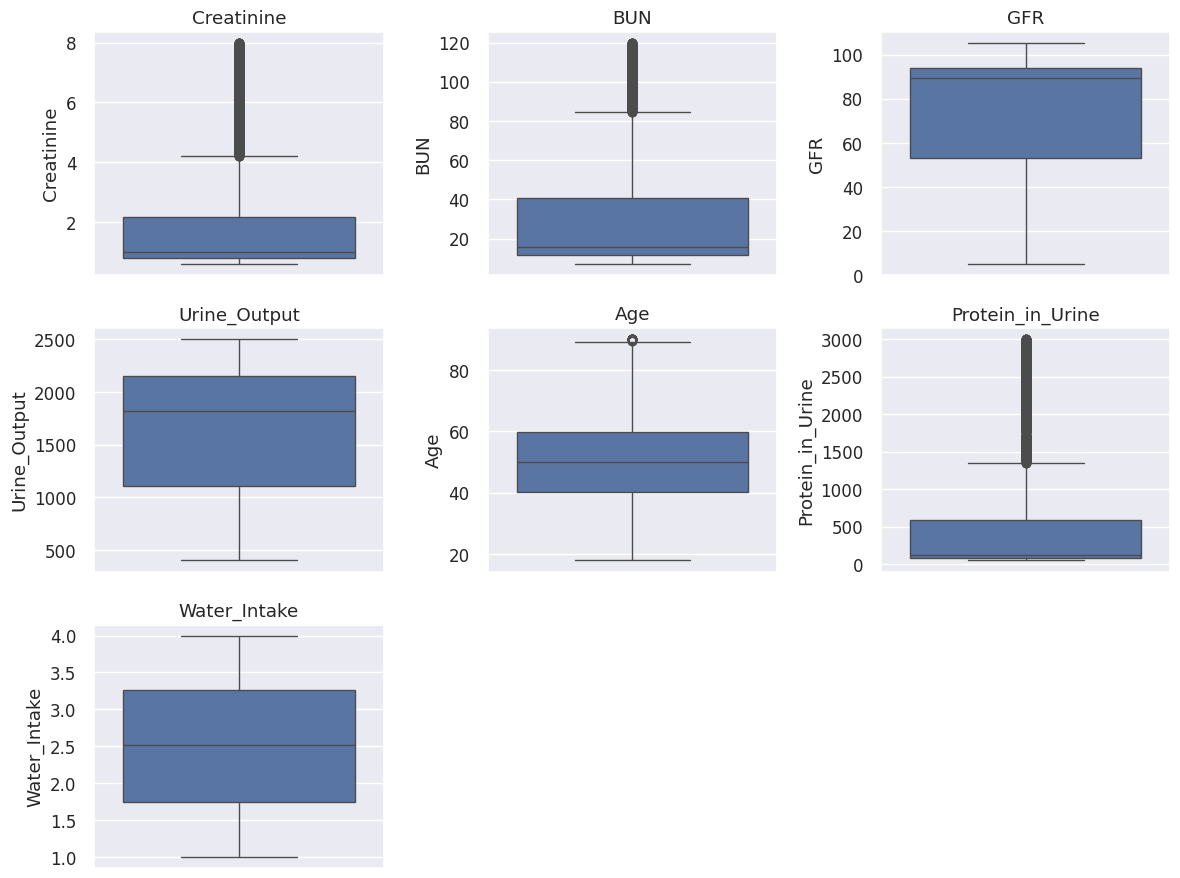

In [25]:
plt.figure(figsize=(4 * ((n + 2) // 3), 3 * 3))

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.savefig("reports/figures/numeric_boxplots.png")
plt.show()


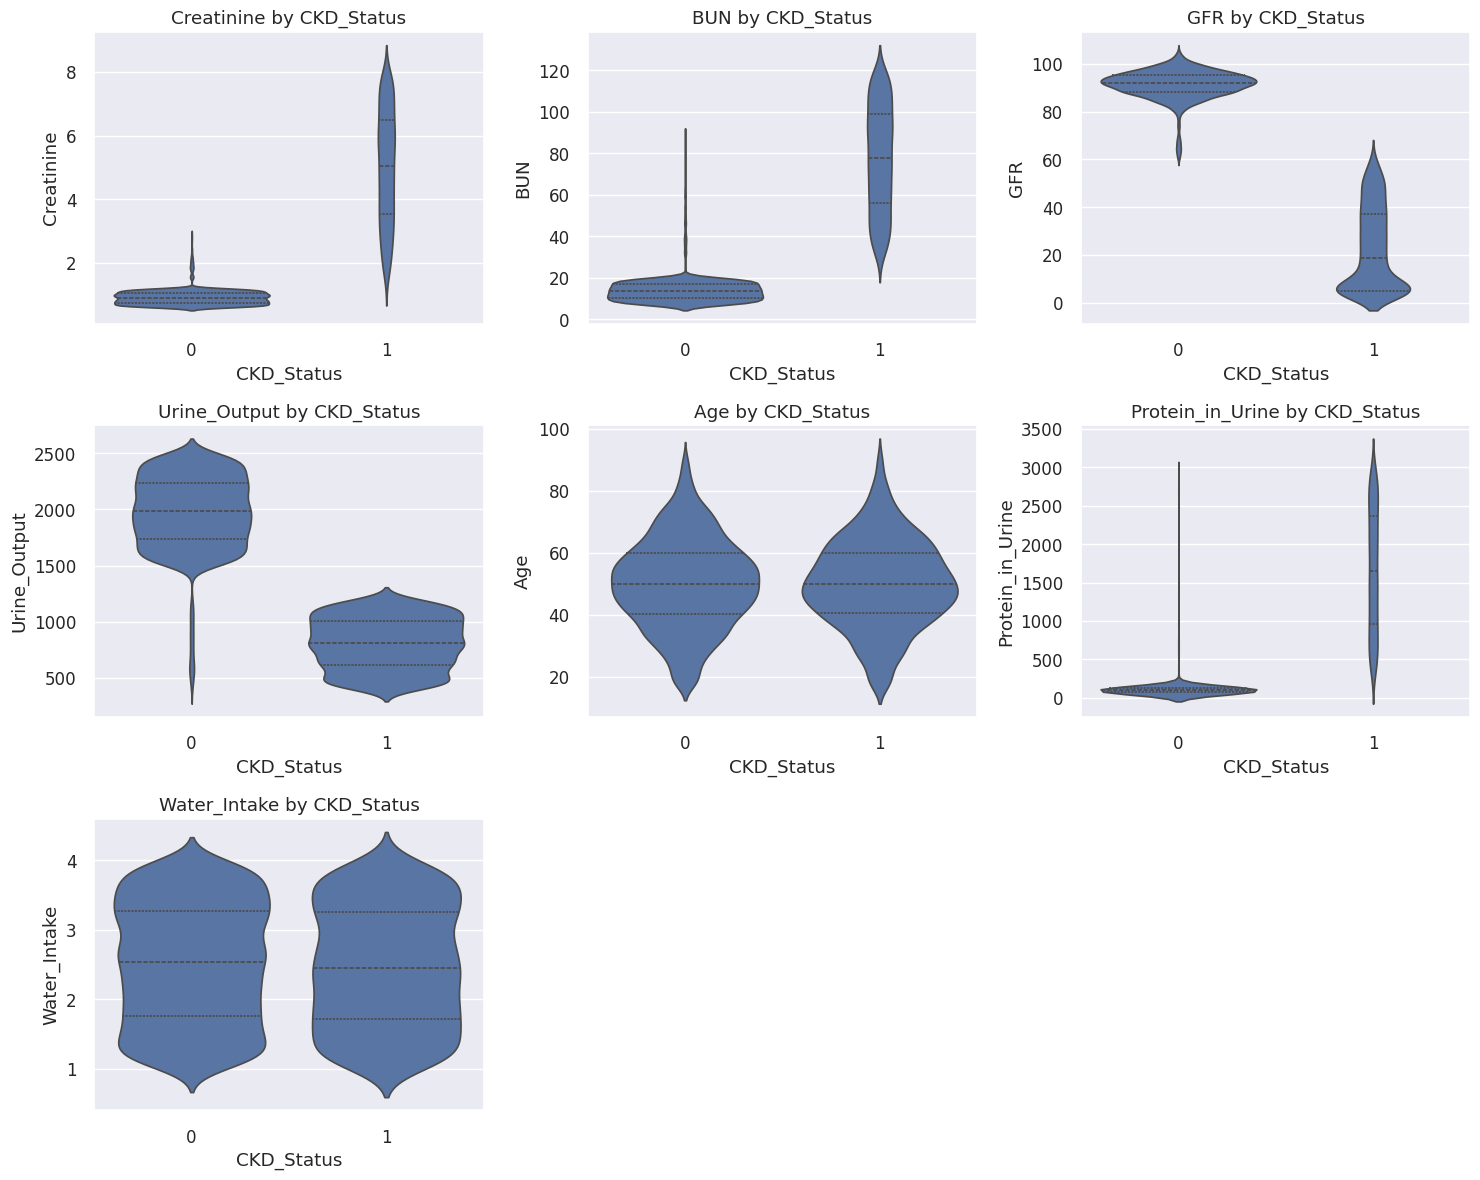

In [26]:
rows = (len(num_cols) + 2) // 3
plt.figure(figsize=(5 * 3, 4 * rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, 3, i)
    sns.violinplot(x=df[TARGET_COL], y=df[col], inner="quartile")
    plt.xlabel("CKD_Status")
    plt.title(f"{col} by CKD_Status")

plt.tight_layout()
plt.savefig("reports/figures/numeric_vs_target_violin.png")
plt.show()


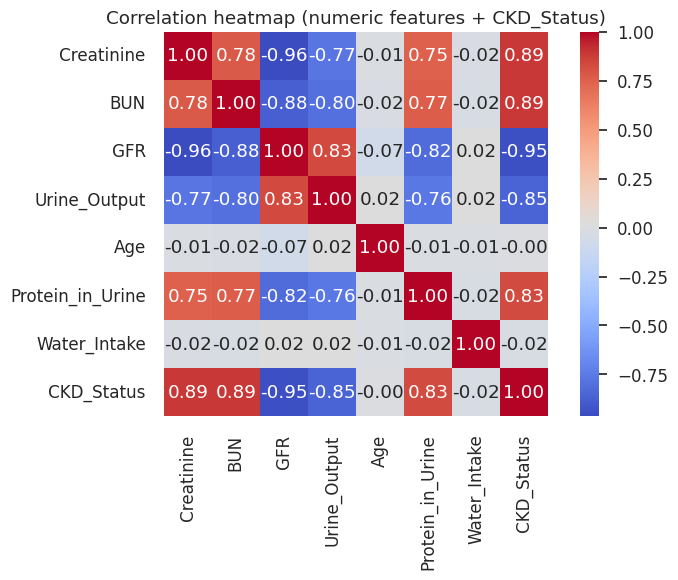

CKD_Status          1.000000
BUN                 0.888944
Creatinine          0.887267
Protein_in_Urine    0.828957
Age                -0.002403
Water_Intake       -0.021147
Urine_Output       -0.852535
GFR                -0.947014
Name: CKD_Status, dtype: float64

In [29]:
corr = df[num_cols + [TARGET_COL]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation heatmap (numeric features + CKD_Status)")
plt.tight_layout()
plt.savefig("reports/figures/correlation_heatmap.png")
plt.show()

corr[TARGET_COL].sort_values(ascending=False)


In [30]:
def iqr_outlier_pct(series):
    q1, q3 = series.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = ((series < lower) | (series > upper)).mean() * 100
    return round(outliers, 2)

outlier_summary = pd.DataFrame({
    "feature": num_cols,
    "outlier_pct": [iqr_outlier_pct(df[c].dropna()) for c in num_cols]
})
outlier_summary.sort_values("outlier_pct", ascending=False)


,feature,outlier_pct
5,Protein_in_Urine,17.22
0,Creatinine,16.84
1,BUN,11.18
4,Age,0.30
2,GFR,0.00
3,Urine_Output,0.00
6,Water_Intake,0.00



Diabetes vs CKD_Status


CKD_Status,0,1
Diabetes,,
0,73.68,26.32
1,73.74,26.26


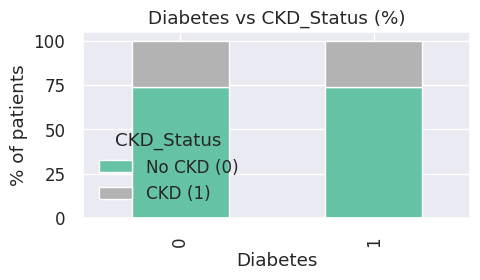


Hypertension vs CKD_Status


CKD_Status,0,1
Hypertension,,
0,74.94,25.06
1,71.66,28.34


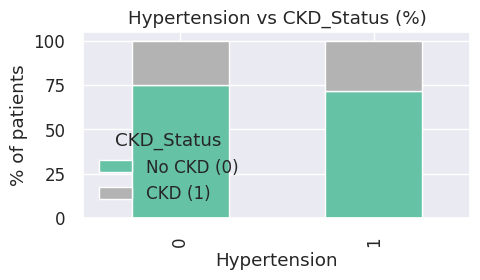


Medication vs CKD_Status


CKD_Status,0,1
Medication,,
ACE Inhibitor,72.06,27.94
ARB,74.97,25.03
Diuretic,69.68,30.32


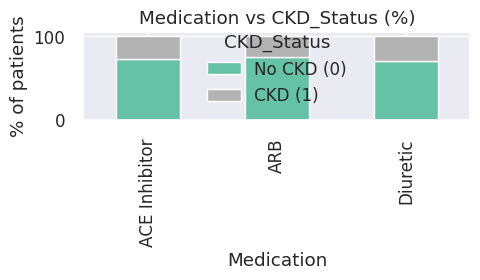

In [28]:
for col in cat_cols:
    ct = pd.crosstab(df[col], df[TARGET_COL], normalize="index") * 100
    print(f"\n{col} vs {TARGET_COL}")
    display(ct.round(2))

    ax = ct.plot(kind="bar", stacked=True, figsize=(5, 3), colormap="Set2")
    plt.ylabel("% of patients")
    plt.title(f"{col} vs CKD_Status (%)")
    plt.legend(["No CKD (0)", "CKD (1)"], title="CKD_Status")
    plt.tight_layout()
    plt.savefig(f"reports/figures/{col}_vs_target.png")
    plt.show()


Train accuracy: 1.0
Test accuracy: 1.0


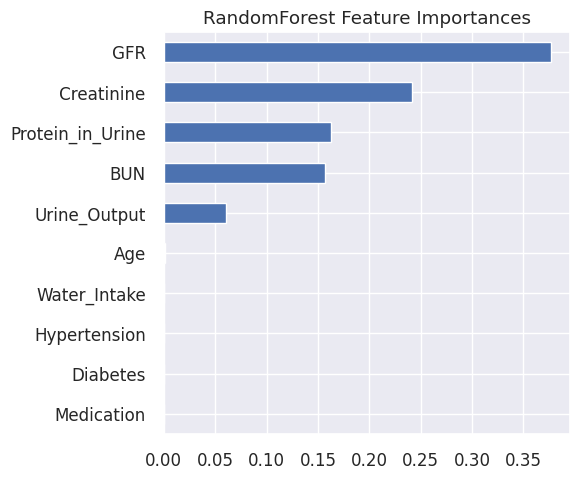

GFR                 0.376964
Creatinine          0.241385
Protein_in_Urine    0.162551
BUN                 0.156726
Urine_Output        0.060589
Age                 0.000807
Water_Intake        0.000614
Hypertension        0.000183
Diabetes            0.000092
Medication          0.000089
dtype: float64

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Basic preprocessing: simple label encoding for categoricals
df_model = df.copy()

for col in cat_cols:
    df_model[col] = df_model[col].astype("category").cat.codes

X = df_model[num_cols + cat_cols]
y = df_model[TARGET_COL]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)
rf.fit(X_train, y_train)

print("Train accuracy:", rf.score(X_train, y_train))
print("Test accuracy:", rf.score(X_test, y_test))

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True)

plt.figure(figsize=(6, 5))
importances.plot(kind="barh")
plt.title("RandomForest Feature Importances")
plt.tight_layout()
plt.savefig("reports/figures/feature_importances.png")
plt.show()

importances.sort_values(ascending=False)
